<a href="https://colab.research.google.com/github/FunminiyiO/Arduino/blob/master/Copy_of_Hourly_Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
data = pd.read_csv('/Users/HP/Desktop/Folders/Work in Progress/DSN Work/AGRO AI/Weather data/Weather Data/Project Datasets/12hrfinal.csv')

In [3]:
data.head()

,temp,hum,dp,press,cat
0,1,4,2,5,0
1,2,4,4,5,1
2,1,5,3,5,1
3,2,4,4,4,1
4,1,5,3,5,1


In [4]:
data.cat.value_counts()

0    4805
1    1993
2      13
Name: cat, dtype: int64

In [0]:
data['1'] = ((data['temp']) +  2 *(data['dp']))
data['3'] = (data['press']) - (1.2*data['temp'])
data['4'] =  ((data['press']) - (1.2*(data['dp'])))
data['5'] = ((data['4']) + data['3'])/2
data['6'] = ((data['dp']) * data['1'])/2

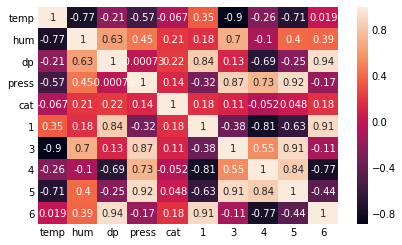

In [6]:
sns.heatmap(data.corr(),annot=True)

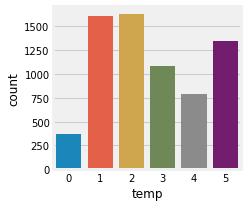

In [7]:
plt.figure(figsize=(3,3))
sns.countplot(data.temp)

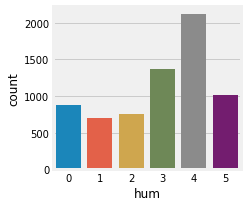

In [8]:
plt.figure(figsize=(3,3))
sns.countplot(data.hum)

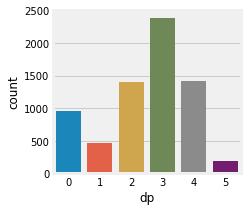

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(data.dp)

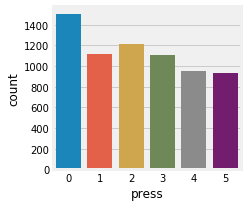

In [10]:
plt.figure(figsize=(3,3))
sns.countplot(data.press)

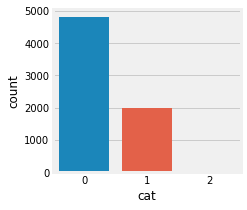

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(data.cat)

In [12]:
target = data['cat'] 
data = data.drop("cat", 1)
# data = data.drop('temp', 1)
# data = data.drop('hum', 1)
imp = data
d_columns = data.columns
data.head()

,temp,hum,dp,press,1,3,4,5,6
0,1,4,2,5,5,3.8,2.6,3.2,5.0
1,2,4,4,5,10,2.6,0.2,1.4,20.0
2,1,5,3,5,7,3.8,1.4,2.6,10.5
3,2,4,4,4,10,1.6,-0.8,0.4,20.0
4,1,5,3,5,7,3.8,1.4,2.6,10.5


In [0]:
x = data
y = target

from imblearn.over_sampling import SMOTE, ADASYN
x_resampled, y_resampled = SMOTE().fit_resample(x, y)
x = x_resampled
target = y_resampled

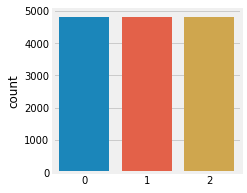

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(target)

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, target, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.metrics import roc_auc_score,f1_score ,accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0,max_depth=7,max_features=4,min_samples_leaf=10,min_samples_split=14,bootstrap=False)
model = model.fit(xTrain, yTrain)

In [18]:
y_pred= model.predict(xTest)
print(confusion_matrix(yTest,y_pred))
print(classification_report(yTest,y_pred))
print(accuracy_score(yTest,y_pred))

[[516 365  56]
 [204 661 101]
 [  0   5 975]]
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       937
           1       0.64      0.68      0.66       966
           2       0.86      0.99      0.92       980

    accuracy                           0.75      2883
   macro avg       0.74      0.74      0.74      2883
weighted avg       0.74      0.75      0.74      2883

0.7464446756850502


In [19]:
print(model.feature_importances_)

[0.05821672 0.12653105 0.04481355 0.31328881 0.07207219 0.08829704
 0.10142892 0.12328185 0.07206987]


In [0]:
importances = model.feature_importances_

[0.05821672 0.12653105 0.04481355 0.31328881 0.07207219 0.08829704
 0.10142892 0.12328185 0.07206987]


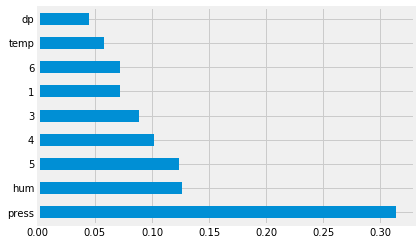

In [21]:
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [0]:
test = pd.read_csv('/Users/HP/Desktop/Folders/Work in Progress/DSN Work/AGRO AI/Weather data/Weather Data/Project Datasets/test_y.csv')

In [0]:
len(test)
test.head()

,temp,hum,dp,press,cat
0,2,1,1,2,1
1,3,0,1,2,1
2,3,0,0,2,1
3,3,0,0,2,1
4,3,0,0,1,1


In [0]:
new_cat = test["cat"]
test = test.drop("cat", 1)

In [0]:
test.head()

,temp,hum,dp,press
0,2,1,1,2
1,3,0,1,2
2,3,0,0,2
3,3,0,0,2
4,3,0,0,1


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(test, new_cat, test_size = 0.33, random_state = 0)

In [0]:
new_pred= model.predict(xtest)
print(confusion_matrix(ytest,new_pred))
print(classification_report(ytest,new_pred))
print(accuracy_score(ytest,new_pred))

[[1063    0]
 [   0 2508]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1063
           1       1.00      1.00      1.00      2508

    accuracy                           1.00      3571
   macro avg       1.00      1.00      1.00      3571
weighted avg       1.00      1.00      1.00      3571

1.0
